In [1]:
# Projeto: Rota Inteligente - Otimização de Entregas com IA
# Disciplina: Artificial Intelligence Fundamentals
# ==========================================

# Instalar bibliotecas necessárias (só roda uma vez)
!pip install numpy matplotlib scikit-learn networkx

In [2]:
# Importar as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.cluster import KMeans

In [3]:
# 1. Criar pontos de entrega simulados (como coordenadas da cidade)
# ------------------------------------------
np.random.seed(42)
pontos = np.random.rand(10, 2) * 100  # 10 entregas


In [4]:
# 2. Agrupar as entregas com K-Means (clustering)
# ------------------------------------------
kmeans = KMeans(n_clusters=3, random_state=42)
grupos = kmeans.fit_predict(pontos)

In [5]:
# 3. Criar o grafo da cidade
# ------------------------------------------
G = nx.complete_graph(len(pontos))
for i in range(len(pontos)):
    for j in range(len(pontos)):
        if i != j:
            dist = np.linalg.norm(pontos[i] - pontos[j])
            G[i][j]['weight'] = dist


In [6]:
# 4. Função A* para encontrar o caminho mais curto
# ------------------------------------------
def heuristic(a, b):
    return np.linalg.norm(np.array(a) - np.array(b))

def a_star_search(graph, start, goal):
    from queue import PriorityQueue
    frontier = PriorityQueue()
    frontier.put((0, start))
    came_from = {start: None}
    cost_so_far = {start: 0}

    while not frontier.empty():
        _, current = frontier.get()

        if current == goal:
            break

        for next in graph.neighbors(current):
            new_cost = cost_so_far[current] + graph[current][next]['weight']
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                priority = new_cost + heuristic(pontos[next], pontos[goal])
                frontier.put((priority, next))
                came_from[next] = current
    return came_from, cost_so_far

In [7]:
# 5. Testar o A* entre dois pontos
# ------------------------------------------
inicio, fim = 0, 5
caminho, custo = a_star_search(G, inicio, fim)

In [8]:
# Reconstruir caminho
atual = fim
rota = [fim]
while atual != inicio:
    atual = caminho[atual]
    rota.append(atual)
rota.reverse()


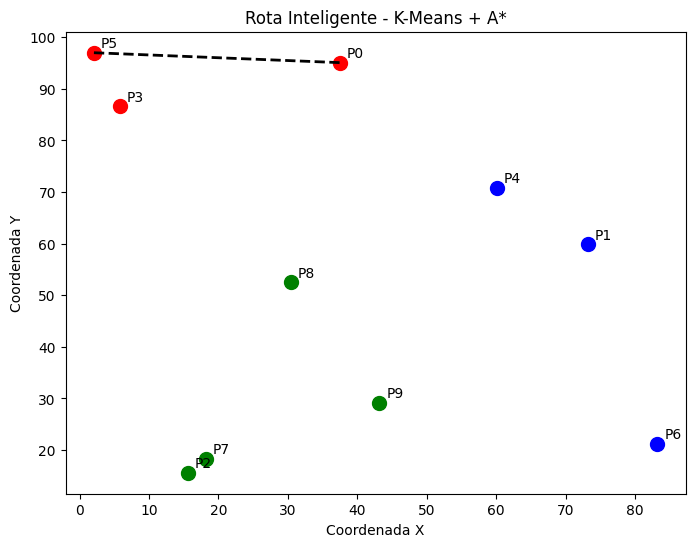

Melhor rota encontrada: [0, 5]


In [9]:
# 6. Visualizar o resultado
# ------------------------------------------
plt.figure(figsize=(8,6))
cores = ['red', 'green', 'blue']

for i in range(len(pontos)):
    plt.scatter(pontos[i][0], pontos[i][1], color=cores[grupos[i]], s=100)
    plt.text(pontos[i][0]+1, pontos[i][1]+1, f"P{i}")

# Plotar o caminho A*
for i in range(len(rota)-1):
    p1, p2 = rota[i], rota[i+1]
    plt.plot([pontos[p1][0], pontos[p2][0]], [pontos[p1][1], pontos[p2][1]], 'k--', lw=2)

plt.title("Rota Inteligente - K-Means + A*")
plt.xlabel("Coordenada X")
plt.ylabel("Coordenada Y")
plt.show()

print("Melhor rota encontrada:", rota)